## Forest Fire Prediction
#### Predict the burned area of forest fires using the provided meteorological and other environmental features.

### Dataset Understending
  1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: 'jan' to 'dec' 
   4. day - day of the week: 'mon' to 'sun'
   5. FFMC - FFMC(Fine Fuel Moisture Code) index from the FWI(Fire Weather Index) system: 18.7 to 96.20
   6. DMC - DMC (Duff Moisture Code) index from the FWI system: 1.1 to 291.3 
   7. DC - DC(Drought Code) index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI(Initial Spread) index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform).

### Dataset URL :  https://archive.ics.uci.edu/ml/datasets/forest+fires

In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("D:\Applied DataScience/forestfires.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
data.describe(include='all')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000


In [6]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
data.shape

(517, 13)

In [8]:
for col in data.columns.to_list():
    print(data[col].name)
    print(data[col].unique())
    print("=" * 30)

X
[7 8 6 5 4 2 9 1 3]
Y
[5 4 6 3 2 9 8]
month
['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
day
['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
FFMC
[86.2 90.6 91.7 89.3 92.3 91.5 91.  92.5 92.8 63.5 90.9 92.9 93.3 84.9
 89.2 86.3 91.8 94.3 90.2 93.5 91.4 92.4 93.4 88.6 90.3 90.  88.1 79.5
 94.8 90.1 94.2 87.2 87.6 92.1 92.6 84.  86.6 93.  91.1 91.2 88.8 84.2
 89.7 83.9 69.  82.1 85.9 84.4 68.2 93.7 85.8 95.5 95.2 96.  85.6 81.5
 86.8 93.9 90.8 90.7 88.3 92.2 81.9 88.  83.  93.1 91.9 91.6 87.5 93.6
 84.6 85.4 84.7 86.9 85.2 90.4 53.4 85.1 89.6 50.4 88.2 92.  18.7 90.5
 84.1 85.  87.9 94.6 87.1 92.7 88.9 89.4 94.  75.1 91.3 93.2 94.9 95.
 95.1 95.8 95.9 96.2 96.1 94.5 81.6 94.4]
DMC
[ 26.2  35.4  43.7  33.3  51.3  85.3  88.9 145.4 129.5  88.   73.2  70.8
 126.5 133.3 141.2  35.8  32.8  27.9  27.4  78.5  96.3 110.9 139.4 142.4
 117.9 149.3  85.1  91.8  69.7  75.6  80.7  41.5  25.7  60.6  96.9 108.3
  82.9  62.3  23.9  52.2 137.   99.6 111.2 114.3  46.5   9.3  13.2

In [9]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [10]:
data[["area"]]

,area
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
512,6.44
513,54.29
514,11.16
515,0.00


### Visualze Class Distribution

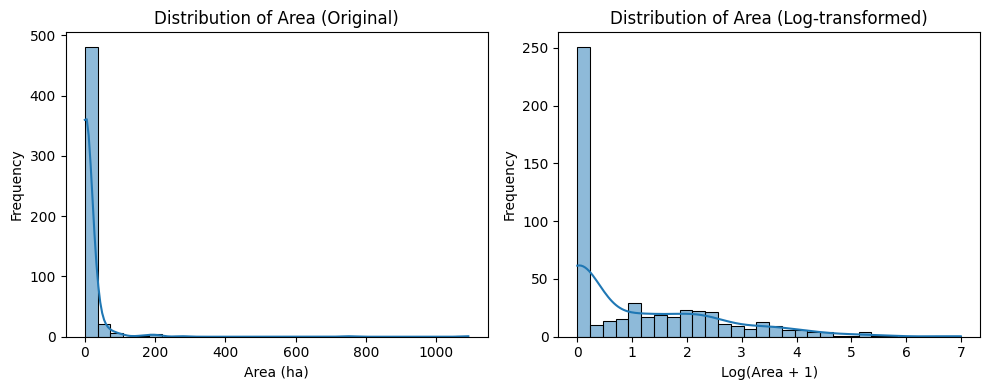

In [11]:
import numpy as np

# Visualize the class distribution of 'area'
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Original distribution
sns.histplot(data['area'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Area (Original)')
axs[0].set_xlabel('Area (ha)')
axs[0].set_ylabel('Frequency')

# Log-transformed distribution
sns.histplot(np.log1p(data['area']), bins=30, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Area (Log-transformed)')
axs[1].set_xlabel('Log(Area + 1)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [12]:
data["area"]= np.log1p(data['area'])

In [13]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


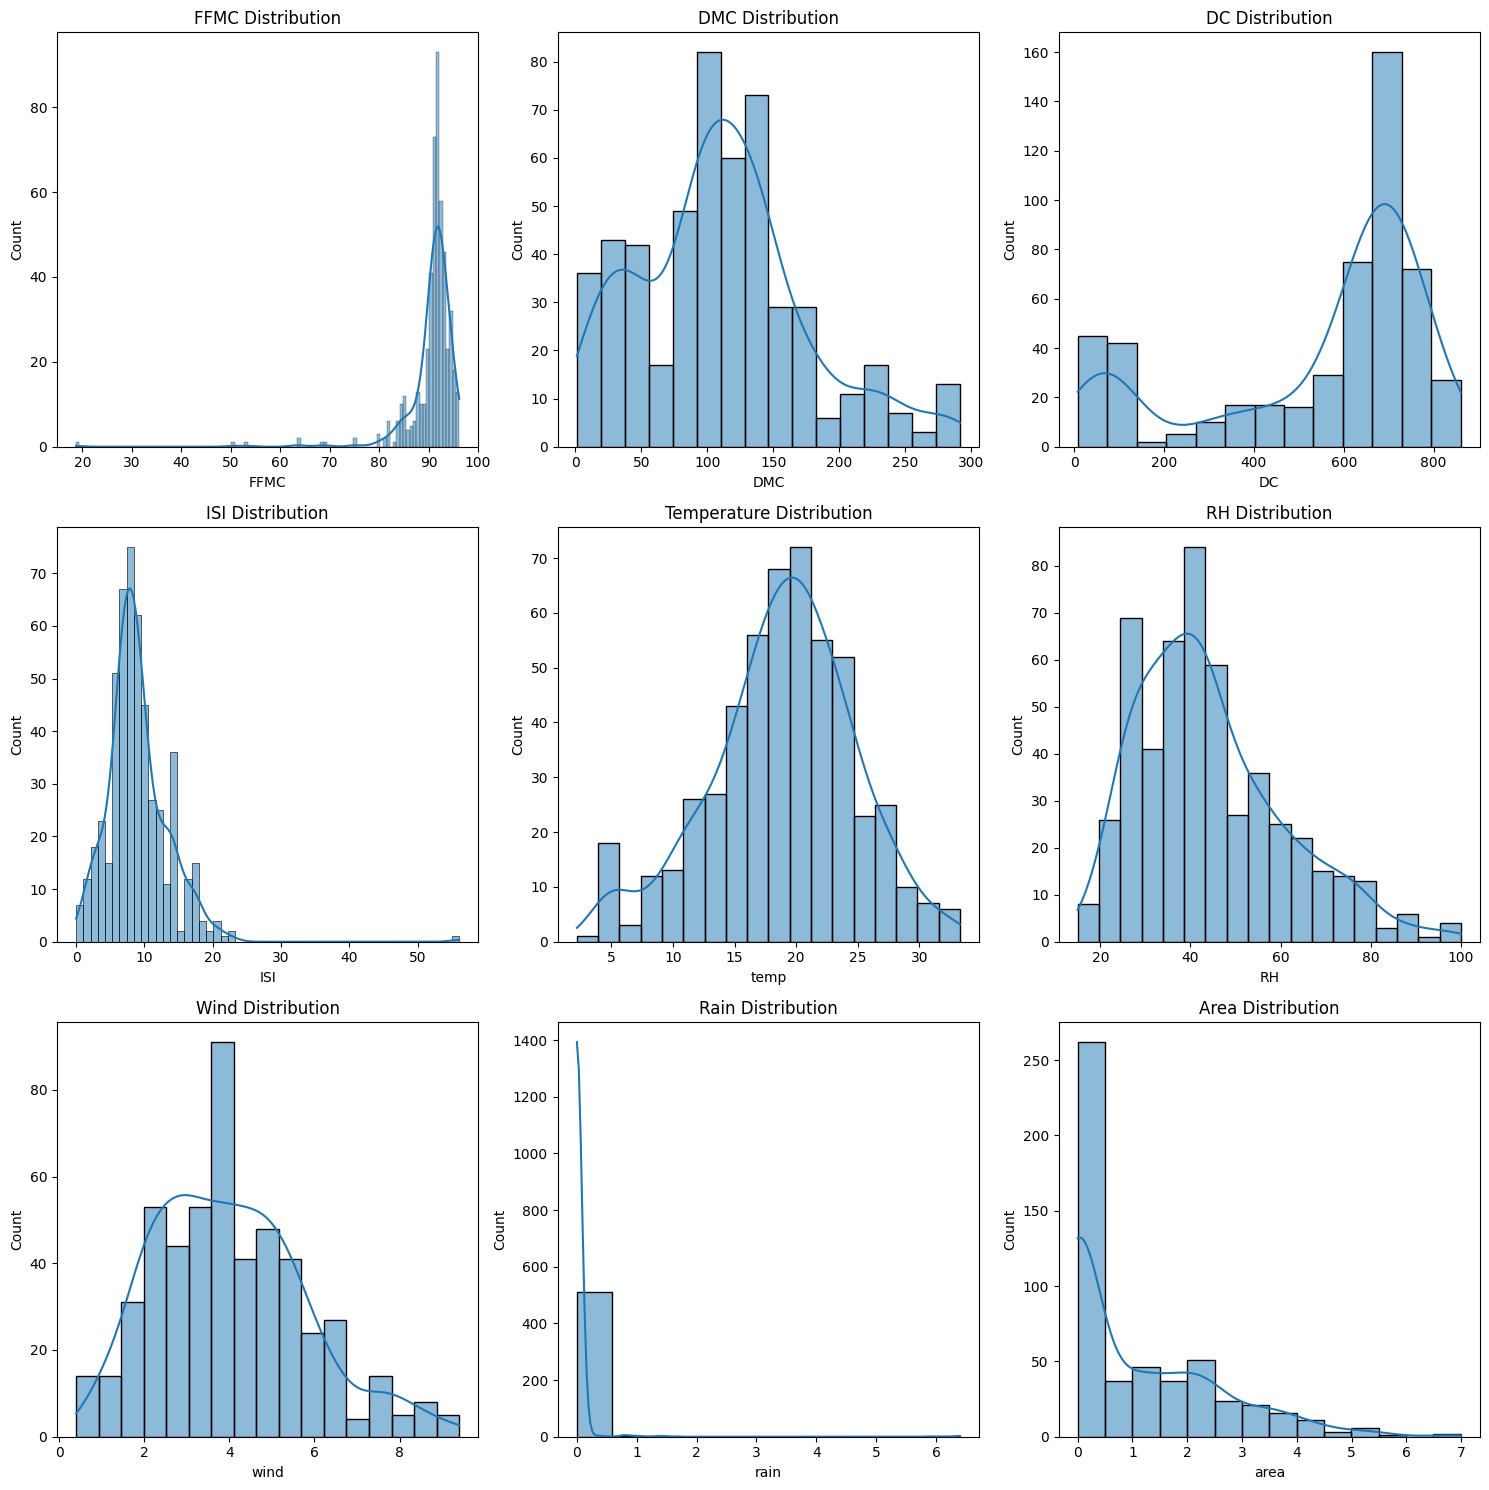

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution plots for numerical variables
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
sns.histplot(data['FFMC'], kde=True, ax=axs[0, 0]).set(title='FFMC Distribution')
sns.histplot(data['DMC'], kde=True, ax=axs[0, 1]).set(title='DMC Distribution')
sns.histplot(data['DC'], kde=True, ax=axs[0, 2]).set(title='DC Distribution')
sns.histplot(data['ISI'], kde=True, ax=axs[1, 0]).set(title='ISI Distribution')
sns.histplot(data['temp'], kde=True, ax=axs[1, 1]).set(title='Temperature Distribution')
sns.histplot(data['RH'], kde=True, ax=axs[1, 2]).set(title='RH Distribution')
sns.histplot(data['wind'], kde=True, ax=axs[2, 0]).set(title='Wind Distribution')
sns.histplot(data['rain'], kde=True, ax=axs[2, 1]).set(title='Rain Distribution')
sns.histplot(data['area'], kde=True, ax=axs[2, 2]).set(title='Area Distribution')
plt.tight_layout()

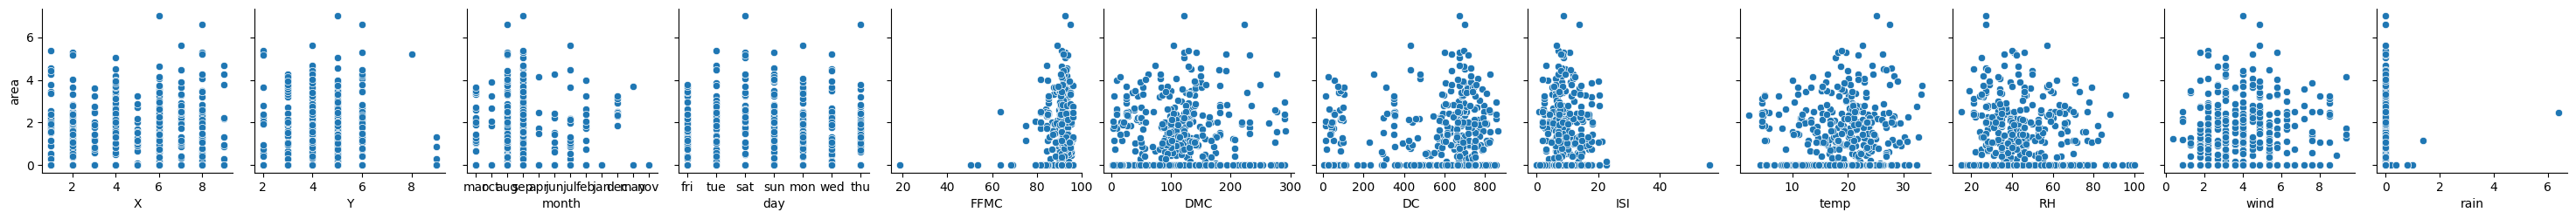

In [15]:
sns.pairplot(data, x_vars=data.columns[:-1], y_vars='area')
plt.show()

<Axes: >

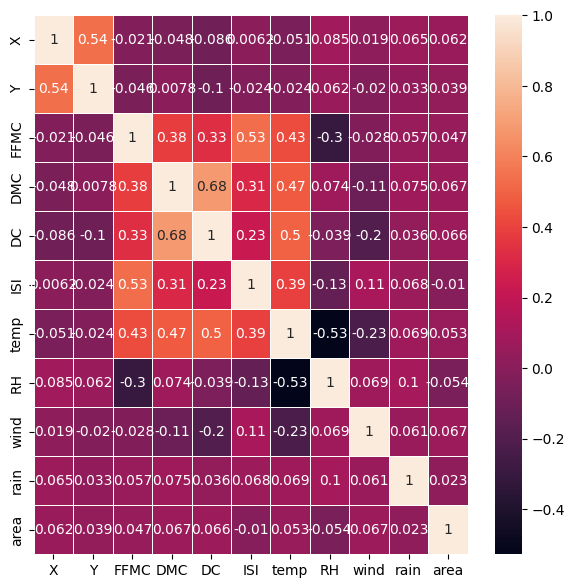

In [16]:
data_1 = data.drop(["day","month"], axis =1)
df_corr = data_1.corr()

fig, ax = plt.subplots(figsize=(7,7))     
sns.heatmap(df_corr, annot=True, linewidths=.5, ax=ax)

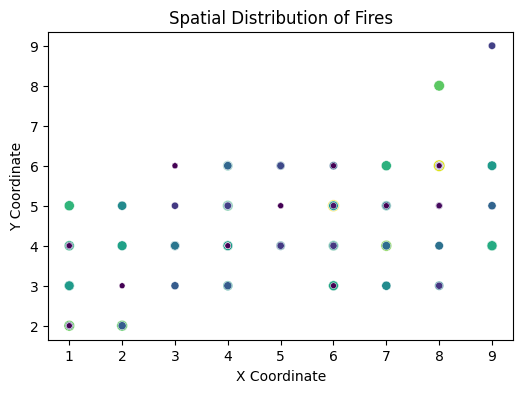

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='X', y='Y', size='area', hue='area', data=data, palette='viridis', legend=False)
plt.title('Spatial Distribution of Fires')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

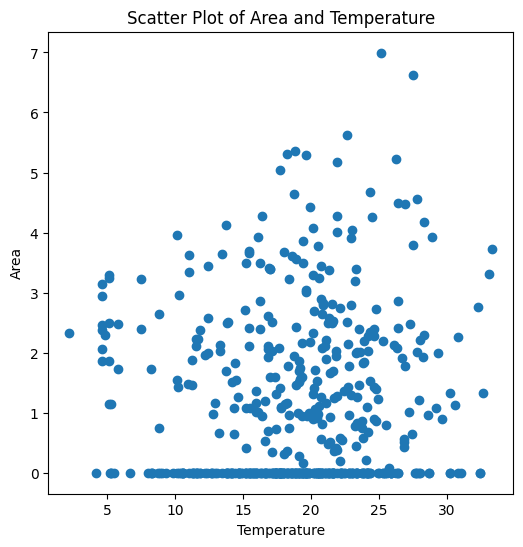

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(data['temp'], data['area'])
plt.title('Scatter Plot of Area and Temperature')
plt.xlabel('Temperature')
plt.ylabel('Area')
plt.show()

In [19]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


In [20]:
# Changing categorical values into numerical values
# Months
data['month'].replace({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
                           'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12},
                           inplace = True)

# Days
data['day'].replace({'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6, 'sat' : 7}, inplace = True)


C:\Users\User\AppData\Local\Temp\ipykernel_3280\4292490370.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['month'].replace({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
C:\Users\User\AppData\Local\Temp\ipykernel_3280\4292490370.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [21]:
# Normalization of the features
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

# FFMC, DMC, DC, ISI, RH
data['FFMC'] = minmax.fit_transform(np.array(data['FFMC']).reshape(-1, 1))
data['DMC'] = minmax.fit_transform(np.array(data['DMC']).reshape(-1, 1))
data['DC'] = minmax.fit_transform(np.array(data['DC']).reshape(-1, 1))
data['ISI'] = minmax.fit_transform(np.array(data['ISI']).reshape(-1, 1))
data['RH'] = minmax.fit_transform(np.array(data['RH']).reshape(-1, 1))

In [22]:
data = data.drop(['month', 'day'], axis=1)

In [23]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
print(X_train.shape)
print(X_test.shape)

(413, 10)
(104, 10)


In [26]:
data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,0.870968,0.086492,0.101325,0.090909,8.2,0.423529,6.7,0.0,0.000000
1,7,4,0.927742,0.118194,0.775419,0.119430,18.0,0.211765,0.9,0.0,0.000000
2,7,4,0.927742,0.146795,0.796294,0.119430,14.6,0.211765,1.3,0.0,0.000000
3,8,6,0.941935,0.110958,0.081623,0.160428,8.3,0.964706,4.0,0.2,0.000000
4,8,6,0.910968,0.172984,0.110590,0.171123,11.4,0.988235,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,0.811613,0.191592,0.771315,0.033868,27.8,0.200000,2.7,0.0,2.006871
513,2,4,0.811613,0.191592,0.771315,0.033868,21.9,0.658824,5.8,0.0,4.012592
514,7,4,0.811613,0.191592,0.771315,0.033868,21.2,0.647059,6.7,0.0,2.498152
515,1,4,0.976774,0.499311,0.711622,0.201426,25.6,0.317647,4.0,0.0,0.000000


### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("MSE",mean_squared_error(y_test,y_pred))

MSE 2.4772126908730403


### Decision Tree Regression

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test, y_pred_dt))

MSE 4.4896598450291965
R2 score -0.8647927091830672


### Neural Network

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# Initialize the Neural Network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))
# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
# Train the model
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
# Make predictions
y_pred_nn = nn_model.predict(X_test)
# Evaluate the model
print("MSE",mean_squared_error(y_test, y_pred_nn))
print("R2 score",r2_score(y_test, y_pred_nn))

C:\Users\User\anaconda3\envs\ml_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.1963 - val_loss: 1.8420
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7026 - val_loss: 1.7846
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8583 - val_loss: 1.7286
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7486 - val_loss: 1.7080
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1815 - val_loss: 1.7187
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6841 - val_loss: 1.7229
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7226 - val_loss: 1.8362
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7185 - val_loss: 1.6912
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8519 - val_loss: 1.7802
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7637 - val_loss: 1.6576
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7177 - val_loss: 1.6681
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.